In [1]:
# Import required packages here (after they are installed)
import numpy as np
import matplotlib.pyplot as mp
from pylab import show

# Load data. csv file should be in the same folder as the notebo ok for this to work, otherwise
# give data path.

data = np.loadtxt("transfusion.csv", dtype = float, delimiter=',', skiprows=1)

In [2]:
features = [] 
donated = []

for row in data:
    features.append(row[:4]) 
    donated.append(str(row[4]))

# print( features[0])
# print( donated[0])

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

scores = [[],[],[]]

i = 0
for hidden_layers in [1, 2, 5]:
    for num_nodes in [2, 5, 10]:
        the_tuple = [num_nodes] * hidden_layers 
#         the_tuple = []
#         for x in range (hidden_layers):
#             the_tuple.append( num_nodes)
        the_tuple = tuple(the_tuple)
        print(the_tuple)
        model = MLPClassifier(hidden_layer_sizes=(the_tuple),activation='relu',epsilon=0.001,max_iter=10000,alpha=0,solver='adam')
        scores[ i].append( 1 - np.average( cross_val_score( model, features, donated, cv=10)))
    i += 1


(2,)
(5,)
(10,)
(2, 2)
(5, 5)
(10, 10)
(2, 2, 2, 2, 2)
(5, 5, 5, 5, 5)
(10, 10, 10, 10, 10)


In [13]:
print ( scores)
print("Highest accuracy found with 2 hidden layers and 5 nodes per layer")

[[0.2526126126126126, 0.24189189189189197, 0.30594594594594593], [0.2712792792792793, 0.23792792792792794, 0.23913513513513518], [0.23794594594594598, 0.24461261261261258, 0.2446306306306305]]
Highest accuracy found with 2 hidden layers and 5 nodes per layer


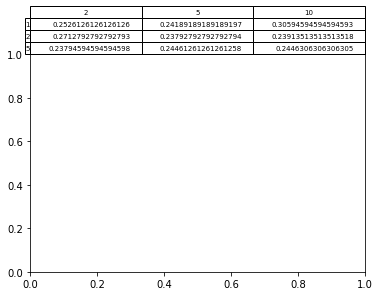

In [5]:
the_table = mp.table(cellText=scores,
                      rowLabels=[1,2,5],
                      colLabels=[2,5,10],
                    loc='top')
mp.show()


In [6]:
hw1data = np.loadtxt("data.csv")

#shuffle the data and select training and test data
np.random.seed(100) 
np.random.shuffle(data)

featuresHw1 = [] 
digits = []

for row in hw1data:
#import the data and select only the 1's and 5's 
    if(row[0]==1 or row[0]==5):
        featuresHw1.append(row[1:]) 
        digits.append(str(row[0]))

#Select the proportion of data to use for training. #Notice that we have set aside 80% of the data for testing 
numTrain = int(len(features)*.2)

trainFeatures = features[:numTrain] 
testFeatures = features[numTrain:] 
trainDigits = digits[:numTrain] 
testDigits = digits[numTrain:]

#Convert the 256D data (trainFeatures) to 2D data
#We need X and Y for plotting and simpleTrain for building the model.
#They contain the same points in a different arrangement

X = []
Y = []
simpleTrain = []

#Colors will be passed to the graphing library to color the points.
#1's are blue: "b" and 5's are red: "r"
colors = []
for index in range(len(trainFeatures)):
    #produce the 2D dataset for graphing/training and scale the data so it is in the [-1,1] square
    xNew = 2*np.average(trainFeatures[index])+.75 
    yNew = 3*np.var(trainFeatures[index])-1.5
    X.append(xNew)
    Y.append(yNew)
    simpleTrain.append([xNew,yNew])

In [7]:
import time

scoresHw1Features = [[],[],[],[]]
runtimes = [[],[],[],[]]

i = 0
for hidden_layers in [1, 2, 5, 10]:
    for num_nodes in [2, 5, 10, 50, 100]:
        the_tuple = [num_nodes] * hidden_layers
        the_tuple = tuple(the_tuple)
        print(the_tuple)
        start_time = time.time();
        model = MLPClassifier(hidden_layer_sizes=(the_tuple), activation='relu', epsilon=0.001, max_iter=10000, alpha=0, solver="adam")
        scoresHw1Features[ i].append( 1 - np.average( cross_val_score( model, trainFeatures, trainDigits, cv=10)))
        end_time = time.time();
        total_time = end_time - start_time
        runtimes[ i].append( total_time)
    i += 1


for i in range( len( runtimes)):
    for j in range( len( runtimes[0])):
        runtimes[ i][ j] = runtimes[ i][ j] * 1000 # convert seconds to milliseconds

(2,)
(5,)
(10,)
(50,)
(100,)
(2, 2)
(5, 5)
(10, 10)
(50, 50)
(100, 100)
(2, 2, 2, 2, 2)
(5, 5, 5, 5, 5)
(10, 10, 10, 10, 10)
(50, 50, 50, 50, 50)
(100, 100, 100, 100, 100)
(2, 2, 2, 2, 2, 2, 2, 2, 2, 2)
(5, 5, 5, 5, 5, 5, 5, 5, 5, 5)
(10, 10, 10, 10, 10, 10, 10, 10, 10, 10)
(50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
(100, 100, 100, 100, 100, 100, 100, 100, 100, 100)


In [8]:
print( "CV-Errors")
for i in range( len( scoresHw1Features)):
    print ( scoresHw1Features[i])

print("Runtimes")
for i in range( len( runtimes)):
    print ( runtimes[i])

CV-Errors
[0.3080952380952382, 0.38142857142857145, 0.3414285714285714, 0.2880952380952382, 0.30333333333333345]
[0.2814285714285715, 0.41285714285714303, 0.31000000000000005, 0.42999999999999994, 0.3480952380952381]
[0.26142857142857145, 0.2947619047619048, 0.31666666666666665, 0.3280952380952382, 0.3480952380952381]
[0.26142857142857145, 0.26142857142857145, 0.26142857142857145, 0.26142857142857145, 0.3019047619047619]
Runtimes
[1813.6482238769531, 927.0899295806885, 947.9062557220459, 175.66609382629395, 312.87598609924316]
[2732.5289249420166, 1495.4001903533936, 462.25500106811523, 323.5502243041992, 366.77026748657227]
[3323.112964630127, 3598.2279777526855, 1844.020128250122, 1237.2093200683594, 1158.6182117462158]
[5783.318042755127, 3155.7679176330566, 2534.7840785980225, 3986.4871501922607, 4590.99268913269]


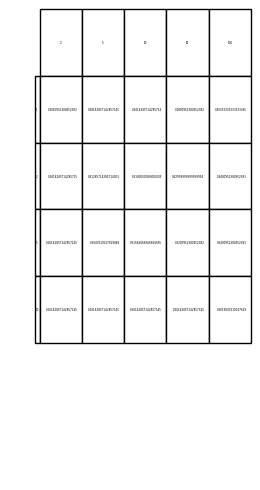

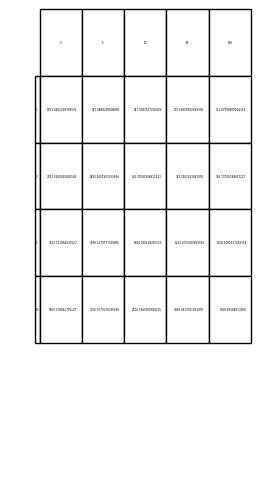

In [14]:
figure = mp.figure(dpi=100)
ax = figure.add_subplot(2, 2, 2)

the_table = ax.table(cellText=scoresHw1Features,
                      rowLabels=[1,2,5,10],
                      colLabels=[2, 5, 10, 50, 100],
                    loc='top')
the_table.scale(1,4)
the_table.set_fontsize(14)
ax.axis('off')
mp.show()


figure = mp.figure(dpi=100)
ax = figure.add_subplot(2, 2, 2)

the_table = ax.table(cellText=runtimes,
                      rowLabels=[1,2,5,10],
                      colLabels=[2, 5, 10, 50, 100],
                    loc='top')
the_table.scale(1,4)
the_table.set_fontsize(14)
ax.axis('off')
mp.show()


*Note my runtimes vary drastically with each run

a) The runtime seems to increase as the number of layers increase, but decrease as the number of nodes per layer increases. So, they seem to have the opposite effect.

b) The optimum result seems to be found at 10 layers and 50 nodes per layer.

In [10]:
the_tuple = tuple([50] * 10)

optimalscores = []
optimalruntime = []

for learnrate in [0.00001, 0.0001, 0.001, 0.01, 0.1]:
    start_time = time.time();
    model = MLPClassifier(learning_rate_init=learnrate, hidden_layer_sizes=(the_tuple), activation='relu', epsilon=0.001, max_iter=10000, alpha=0, solver="adam")
    optimalscores.append( 1 - np.average( cross_val_score( model, trainFeatures, trainDigits, cv=10)))
    optimalruntime.append( time.time() - start_time)
    
print( optimalscores)
print( optimalruntime)

[0.35476190476190483, 0.2947619047619048, 0.26142857142857145, 0.25476190476190474, 0.26142857142857145]
[11.959640741348267, 4.220972061157227, 5.357722043991089, 3.5515692234039307, 1.4335618019104004]


c) Decreasing the learning rate from the default seems to increase the error but increasing it from the default does not seem to affect the accuracy. Runtime seems to decrease as learning rate is increased.

d) The neural networks is returning different accuracy values with each run, which is likely due to it always starting with random weights. However, the optimum model seems to be the same one almost every time, if not every. It has a slight impact on the expected fit, which might be very slightly more fitted, but almost about the same.


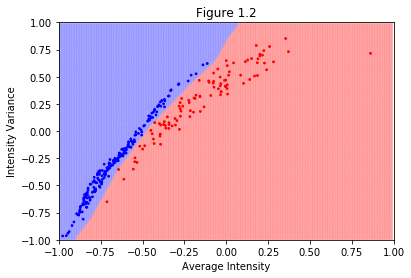

In [11]:
data = np.loadtxt("data.csv")

#shuffle the data and select training and test data
np.random.seed(100)
np.random.shuffle(data)


features = []
digits = []


for row in data:
    #import the data and select only the 1's and 5's
    if(row[0]==1 or row[0]==5):
        features.append(row[1:])
        digits.append(str(row[0]))

        
#Select the proportion of data to use for training. 
#Notice that we have set aside 80% of the data for testing
numTrain = int(len(features)*.2)

trainFeatures = features[:numTrain]
testFeatures = features[numTrain:]
trainDigits = digits[:numTrain]
testDigits = digits[numTrain:]

#Convert the 256D data (trainFeatures) to 2D data
#We need X and Y for plotting and simpleTrain for building the model.
#They contain the same points in a different arrangement

X = []
Y = []
simpleTrain = []

#Colors will be passed to the graphing library to color the points.
#1's are blue: "b" and 5's are red: "r"
colors = []
for index in range(len(trainFeatures)):
    #produce the 2D dataset for graphing/training and scale the data so it is in the [-1,1] square
    xNew = 2*np.average(trainFeatures[index])+.75 
    yNew = 3*np.var(trainFeatures[index])-1.5
    X.append(xNew)
    Y.append(yNew)
    simpleTrain.append([xNew,yNew])
    #trainDigits will still be the value we try to classify. Here it is the string "1.0" or "5.0"
    if(trainDigits[index]=="1.0"):
        colors.append("b")
    else:
        colors.append("r")


# create the model
# 

# Declare Model
model = MLPClassifier( hidden_layer_sizes=(the_tuple), activation='relu', epsilon=0.001, max_iter=10000, alpha=0, solver="adam")
# Fit model to our data
model.fit(simpleTrain,trainDigits)

# Lists to hold inpoints, predictions and assigned colors
xPred = []
yPred = []
cPred = []
# Use input points to get predictions here
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")
            
            
## Visualize Results
#plot the points
mp.scatter(X,Y,s=3,c=colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#label the figure
mp.title("Figure 1.2")

show()